<a href="https://colab.research.google.com/github/YonghunSuh/Yonghun/blob/main/Linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
!nvidia-smi

Tue Oct 26 06:10:45 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 470.74       Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla K80           Off  | 00000000:00:04.0 Off |                    0 |
| N/A   34C    P8    26W / 149W |      0MiB / 11441MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [5]:
import torch 

In [6]:
torch.__version__

'1.9.0+cu111'

In [8]:
import numpy as np
import matplotlib.pyplot as plt

In [10]:
m = 100
X = 2 * torch.rand(m,1)
y = 4+3*X + torch.randn(m,1)  #랜덤 변수, randn 가오시안 분포를 따라감 (랜덤에 노이즈를 줌)

In [11]:
X[:10], y[:10]

(tensor([[1.4316],
         [0.4912],
         [1.5765],
         [1.1123],
         [1.0366],
         [0.1029],
         [0.5448],
         [0.2070],
         [1.1125],
         [0.4106]]), tensor([[8.8824],
         [6.2443],
         [7.3210],
         [7.6254],
         [5.9460],
         [4.2689],
         [7.2408],
         [5.0308],
         [8.0215],
         [6.8165]]))

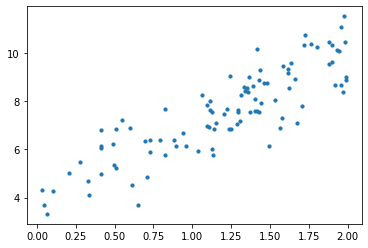

In [26]:
plt.scatter(X, y, s=10)

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
X_train, X_test, y_train, y_test, = train_test_split(X,y ,test_size= 0.2)

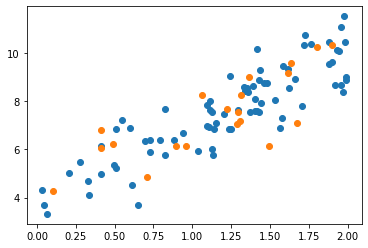

In [23]:
plt.scatter(X_train, y_train)
plt.scatter(X_test, y_test)

In [46]:
from torch import nn as nn
from torch.nn import functional as F

In [47]:
# Model 만들기 
## LinearRegression 만들기


In [80]:
class My_linearRegression(nn.Module) : 
  def __init__(self) :
    super().__init__()

    self.linear = nn.Linear(1,1)

  def forward(self,x):
    return self.linear(x)

In [81]:
model = My_linearRegression()

In [82]:
model

My_linearRegression(
  (linear): Linear(in_features=1, out_features=1, bias=True)
)

In [83]:
out = model(X)

In [84]:
cost = F.mse_loss(out,y)

In [85]:
import torch.optim as optim

In [86]:
optimizer = optim.SGD(model.parameters(),lr = 0.01)

In [87]:
optimizer.zero_grad() #기존 Gradient를 0으로 만들어서 GD를 정상적으로 동작하게 한다. 
cost.backward() # cost function을 미분
optimizer.step() # W를 미분값에 따라서 이동

In [88]:
### Training

In [91]:
model = My_linearRegression()
optimizer = optim.SGD(model.parameters(), lr = 0.01)

epochs = 1000
for epoch in range(epochs) :
  out = model(X_train)
  cost = F.mse_loss(out, y_train)

  optimizer.zero_grad()
  cost.backward()
  optimizer.step()  

  if epoch % 20 == 0:
    params = list(model.parameters())
    W = params[0].item()
    b = params[1].item()

    print(W,b)

0.9588047862052917 -0.5136708617210388
3.190622091293335 1.2555158138275146
3.9075467586517334 1.9032156467437744
4.1143598556518555 2.1699647903442383
4.150379657745361 2.3059873580932617
4.1301589012146 2.3958911895751953
4.092324256896973 2.4683382511138916
4.049866676330566 2.533090353012085
4.007115364074707 2.5935206413269043
3.965480327606201 2.6508429050445557
3.925384044647217 2.705538034439087
3.886920928955078 2.7578351497650146
3.8500747680664062 2.8078761100769043
3.8147943019866943 2.855771064758301
3.7810189723968506 2.901615858078003
3.7486863136291504 2.945500135421753
3.717735528945923 2.987508535385132
3.688107490539551 3.0277209281921387
3.6597464084625244 3.066214084625244
3.6325979232788086 3.1030614376068115
3.606609344482422 3.138333797454834
3.5817322731018066 3.172098398208618
3.5579187870025635 3.2044198513031006
3.535122871398926 3.2353594303131104
3.5133016109466553 3.2649760246276855
3.49241304397583 3.2933273315429688
3.4724175930023193 3.3204660415649414